In [1]:
import os
import sys
import pandas as pd
import numpy as np

notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
# Add the parent directory to the Python path

sys.path.append(parent_dir)

from src.fogliato_reproduction import Fogliato_true_bounds,analyze_metric_sensitivity_Fogliato

import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{fdsymbol}"

/Users/jake/miniconda3/envs/test_fair/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dag_str = "A -> Y, A->P, A->Z, U->P,U->Y, U->Z, Z->Y"
constraints = ["P(Y = 0 & Z = 1)==0", "P(Y = 1 & Z = 0& A=0) <= D"]
unob =["U"]
attribute_node= "A"
outcome_node= "Y"
prediction_node= "P"

compas_predictor_joint = pd.read_csv("../data/trained_models/fogliato_compas.csv")
compas_predictor_joint["Z"] = compas_predictor_joint["Y"]
compas_predictor_joint = compas_predictor_joint.drop("Y",axis=1)

In [3]:
# dag_str = "A -> Y, A->P, A->Z, U->P,U->Y, Z->Y"

In [4]:
analyze_metric_sensitivity_Fogliato(
        observed_joint_table = compas_predictor_joint,
        metric = "FNR", 
        dag_str = dag_str, 
        unob = unob, 
        constraints = constraints,
        outcome_node = outcome_node,
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=0.1, 
)

(0.40121469289722866, 0.6150630830792735, True, True)

In [5]:
Fogliato_true_bounds(
        observed_joint_table = compas_predictor_joint,
        metric = "FPR", 
        dag_str = dag_str, 
        constraints = constraints,
        outcome_node = "Z",
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=0.05,
)

(0.07206008919489859, 0.27853845551991235)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
sns.set_theme()
sns.set_style("whitegrid")

colours = sns.color_palette("tab10", 3)

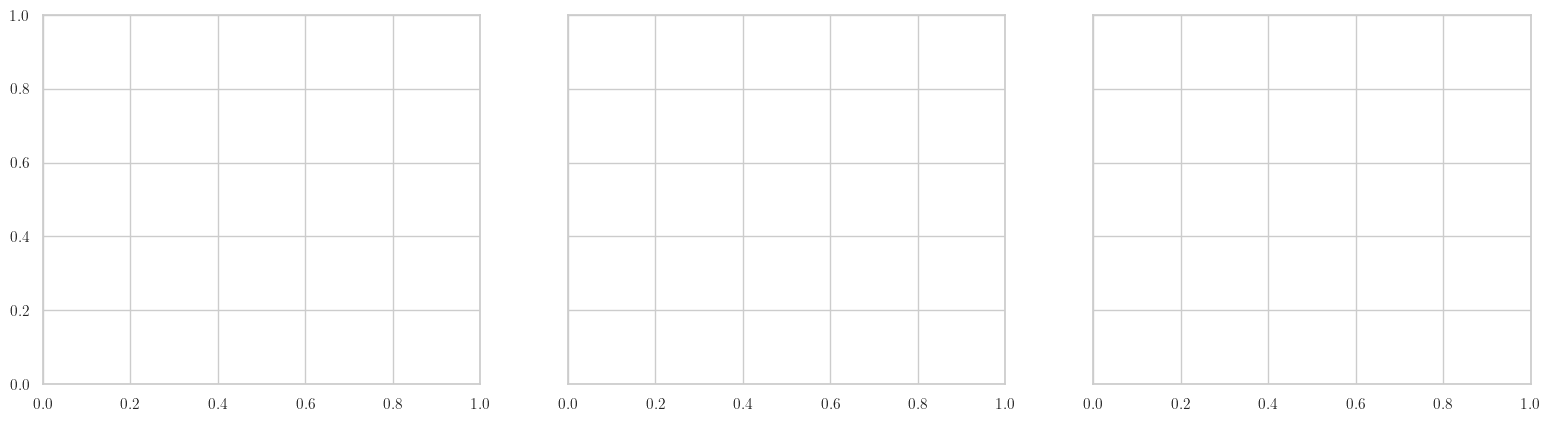

In [7]:
metrics = ["FPR","FNR","PPV"]
max_x = 0.1

true_bound_range = np.linspace(0,max_x,200)
autobounds_range = np.linspace(0,max_x,6)
fig, ax = plt.subplots(nrows=1,ncols=3,sharey=True,figsize= (3*25.6/4,4.8 ))

In [8]:
for i,metric in enumerate(metrics):

    lower_results = []
    upper_results = []
    for val in true_bound_range:
        sens_results = Fogliato_true_bounds(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        constraints = constraints,
        outcome_node = "Z",
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val,
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])
    ax[0].fill_between(true_bound_range, lower_results, upper_results, alpha=.3,color = colours[i])
    ax[0].plot(true_bound_range, upper_results, ls='--', alpha=.6,color=colours[i])
    ax[0].plot(true_bound_range, lower_results, ls='--', alpha=.6,color=colours[i])
    
    lower_results = []
    upper_results = []

    for val in autobounds_range:
        sens_results = analyze_metric_sensitivity_Fogliato(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        unob = unob, 
        constraints = constraints,
        outcome_node = outcome_node,
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val, 
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])

    ax[0].scatter(autobounds_range, upper_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])
    ax[0].scatter(autobounds_range, lower_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])

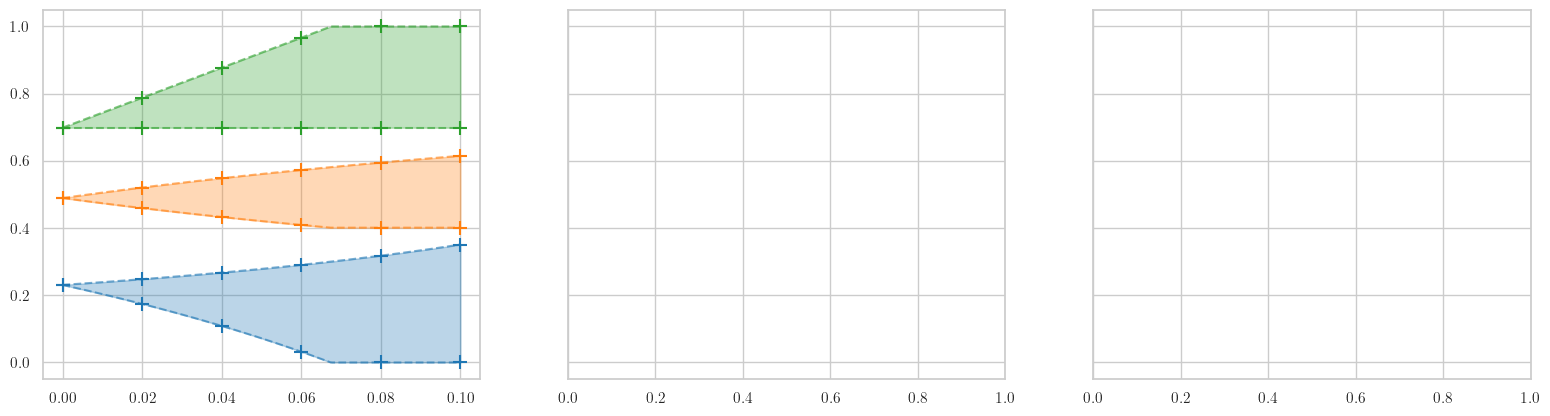

In [9]:
fig

In [10]:
# dag_str = "A->Z, A->P,A->Y, Z->Y, U->P, U->Z"
dag_str = "A -> Y, A->P, Y -> Z, U->P, U -> Y,A->Z"

for i,metric in enumerate(metrics):
    lower_results = []
    upper_results = []

    for val in true_bound_range:
        sens_results = Fogliato_true_bounds(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        constraints = constraints,
        outcome_node = "Z",
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val,
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])
        
    if metric == "FNR":
        ax[1].plot(true_bound_range, lower_results, ls='--', alpha=.6,color=colours[i])
    else:
        ax[1].fill_between(true_bound_range, lower_results, upper_results, alpha=.3,color = colours[i])
        ax[1].plot(true_bound_range, upper_results, ls='--', alpha=.6,color=colours[i])
        ax[1].plot(true_bound_range, lower_results, ls='--', alpha=.6,color=colours[i])
    
    lower_results = []
    upper_results = []

    for val in autobounds_range:
        sens_results = analyze_metric_sensitivity_Fogliato(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        unob = unob, 
        constraints = constraints,
        outcome_node = outcome_node,
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])

    ax[1].scatter(autobounds_range, upper_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])
    ax[1].scatter(autobounds_range, lower_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])

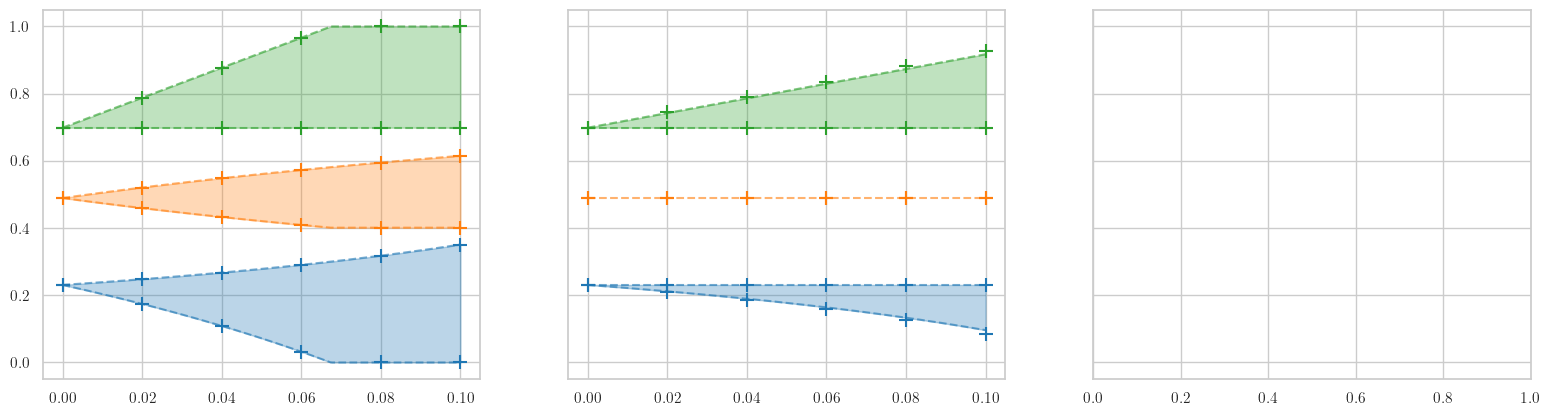

In [11]:
fig

In [12]:
dag_str = "A -> Y, A->P, A->Z, U->P,U->Y, U->Z, Z->Y"
constraints = ["P(Y = 1 & Z = 0)==0", "P(Y = 0 & Z =1& A=0) <= D"]

true_bound_range = np.linspace(0,0.1,200)
autobounds_range = np.linspace(0,0.1,6)

for i,metric in enumerate(metrics):
    lower_results = []
    upper_results = []
    for val in true_bound_range:
        sens_results = Fogliato_true_bounds(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        constraints = constraints,
        outcome_node = "Z",
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val,
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])
    ax[2].fill_between(true_bound_range, lower_results, upper_results, alpha=.3,color = colours[i])
    ax[2].plot(true_bound_range, upper_results, ls='--', alpha=.6,color=colours[i])
    ax[2].plot(true_bound_range, lower_results, ls='--', alpha=.6,color=colours[i])
    
    lower_results = []
    upper_results = []

    for val in autobounds_range:
        sens_results = analyze_metric_sensitivity_Fogliato(
        observed_joint_table = compas_predictor_joint,
        metric = metric, 
        dag_str = dag_str, 
        unob = unob, 
        constraints = constraints,
        outcome_node = outcome_node,
        prediction_node = prediction_node,
        attribute_node = attribute_node,
        sensitivity_parameter_value=val, 
)
        lower_results.append(sens_results[0])
        upper_results.append(sens_results[1])

    ax[2].scatter(autobounds_range, upper_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])
    ax[2].scatter(autobounds_range, lower_results, ls='-', marker='+', s=100,alpha=1,color=colours[i])

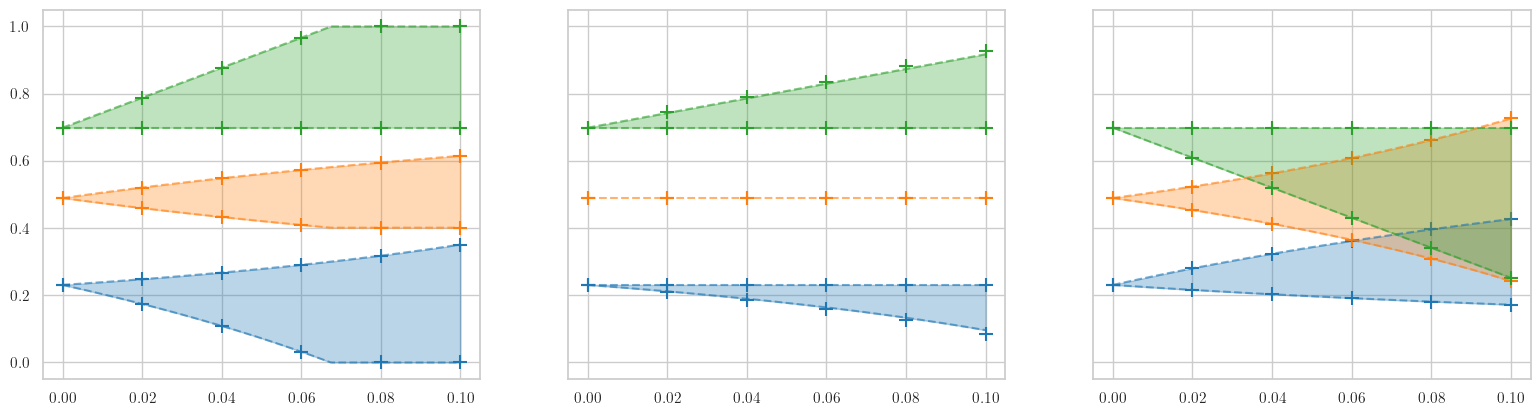

In [13]:
fig

In [14]:
legend_elements = [
                   Patch(facecolor=colours[0],
                         label='Color Patch'),
                     Patch(facecolor=colours[1],
                         label='Color Patch'),
                     Patch(facecolor=colours[2],
                         label='Color Patch'),
                         Line2D([0], [0], color='k', lw=2,ls="--", label='Line'),
                   Line2D([0], [0], marker='+', color='k', label='Scatter',
                          markerfacecolor='b', markersize=15),]
legend_titles = metrics +["Exact","Ours"]
leg = ax[0].legend(legend_elements,legend_titles,loc="upper left",ncol=2,fontsize ="10")

ax[0].set_title(r"(a) Setting from Fogliato et al with $P(Y_P=1 \mid Y=0) = 0$")
ax[1].set_title(r"(b) $P(Y_P=1 \mid Y=0) = 0$ and $\hat{Y} \nlongleftrightarrow A$")
ax[2].set_title(r"(c) $P(Y_P=0 \mid Y=1) = 0$")

ax[0].set_xlabel(r"$P(Y_p \neq Y)$")
ax[1].set_xlabel(r"$P(Y_p \neq Y)$")
ax[2].set_xlabel(r"$P(Y_p \neq Y)$")

ax[0].set_ylabel("Metric value")
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle("Proxy Bias Under Varying Assumptions")

Text(0.5, 0.98, 'Proxy Bias Under Varying Assumptions')

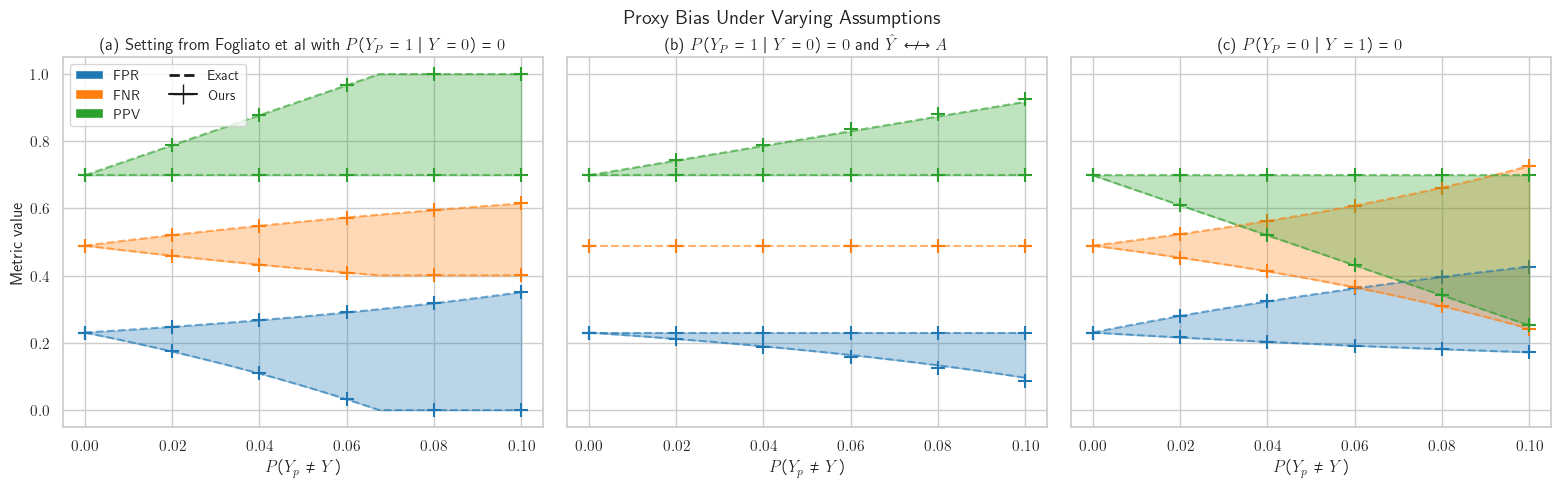

In [15]:
fig